## BFSI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_data= pd.read_csv('application_data.csv')
previous_application_data= pd.read_csv('previous_application.csv')


## Predictive Modeling

In [ ]:
application_data.info(verbose=True)

# verbose=True: When set to True, the method displays a detailed summary of the DataFrame, including information about each column (e.g., data type, number of non-null values) and a summary of the memory usage.

# verbose=False: When set to False, the output will be less detailed, typically only showing the number of columns and their data types, without listing each column individually.

# for better understanding run this code 
# application_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307515 entries, 0 to 307514
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    float64
 1    TARGET                        float64
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  float64
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DA

In [ ]:
target_distribution = application_data['TARGET'].value_counts()/application_data['TARGET'].count()*100
target_distribution

TARGET
0.0    91.927118
1.0     8.072882
Name: count, dtype: float64

- There is an imbalencing in the given data set so what we can do is we can make a balanced dataset for which the balance for 55/45 would be enough.
- Recognizing class imbalance is essential for determining whether techniques such as resampling or employing balanced metrics are necessary to enhance model performance.

#### Create two distinct datasets for the target values [0/1], representing non-defaulters and defaulters.

In [5]:
non_defaulter=application_data[application_data['TARGET']==0]
defaulter=application_data[application_data['TARGET']==1]


non_defaulter.shape,defaulter.shape

((282686, 122), (24825, 122))


- This separation facilitates the analysis of each class's distribution and enables more effective management of class imbalance .

#### Create the new dataset using sampled values

In [6]:
from sklearn.utils import resample

down_sampled_non_defaulters = resample(non_defaulter, replace=False, n_samples=25000, random_state=42)
down_sampled_defaulters = resample(defaulter, replace=False, n_samples=24000, random_state=42)


- This step tackles class imbalance in the dataset, which can result in biased model predictions. By equalizing the sample sizes, we aim to create a more balanced dataset that enables the model to effectively learn patterns from both classes.y.

#### Checking the output

In [7]:
down_sampled_defaulters.shape, down_sampled_non_defaulters.shape

((24000, 122), (25000, 122))

#### Creating a new, balanced dataset

In [8]:
balanced_application= pd.concat([down_sampled_defaulters,down_sampled_non_defaulters])

#### Shuffeling the data 

In [9]:
balanced_application = balanced_application.sample(frac=1, random_state=42).reset_index(drop=True) 


# frac=1 says that 100% of the data should be shuffles
# reset_index(drop=true) says, while we are reordering the rows the original index of the values remains the same to reset them correcly we use reset_index and drop=true say to drop the previous index values completely

In [10]:
balanced_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196491.0,0.0,Cash loans,F,Y,N,1.0,180000.0,797557.5,26487.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,178011.0,0.0,Cash loans,M,Y,Y,1.0,180000.0,521280.0,28408.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,170702.0,0.0,Cash loans,F,N,Y,0.0,171000.0,312768.0,24691.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,106289.0,0.0,Cash loans,F,N,Y,0.0,33300.0,359685.0,15237.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,269366.0,1.0,Cash loans,M,Y,N,2.0,135000.0,1442952.0,39811.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,430408.0,1.0,Cash loans,F,N,Y,0.0,153000.0,1442952.0,39681.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
48996,351828.0,0.0,Cash loans,F,Y,Y,0.0,157500.0,1185120.0,36063.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
48997,212652.0,0.0,Cash loans,F,N,N,0.0,135000.0,540360.0,14382.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48998,140608.0,1.0,Cash loans,M,Y,Y,0.0,247500.0,640080.0,29970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Now that the dataset is balanced, we can proceed with feature selection.

##### Checking for the null values 

In [11]:
balanced_application.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7484
AMT_REQ_CREDIT_BUREAU_WEEK    7484
AMT_REQ_CREDIT_BUREAU_MON     7484
AMT_REQ_CREDIT_BUREAU_QRT     7484
AMT_REQ_CREDIT_BUREAU_YEAR    7484
Length: 122, dtype: int64

<Figure size 1600x800 with 0 Axes>

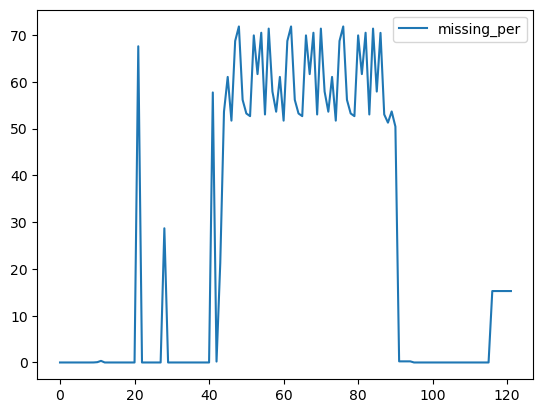

<Figure size 1600x800 with 0 Axes>

In [17]:
missing = pd.DataFrame((balanced_application.isnull().sum())*100/balanced_application.shape[0]).reset_index()
missing = missing.rename(columns={0:"missing_per"})
missing.plot(kind='line')
plt.figure(figsize=(16,8))

In [18]:
missing[missing['missing_per']>40]

,index,missing_per
21,OWN_CAR_AGE,67.610204
41,EXT_SOURCE_1,57.736735
44,APARTMENTS_AVG,53.626531
45,BASEMENTAREA_AVG,61.059184
46,YEARS_BEGINEXPLUATATION_AVG,51.712245
47,YEARS_BUILD_AVG,68.738776
48,COMMONAREA_AVG,71.844898
49,ELEVATORS_AVG,56.157143
50,ENTRANCES_AVG,53.242857
51,FLOORSMAX_AVG,52.671429


In [19]:
missing.columns[0]

'index'

In [22]:
excess_null_val=list(missing[missing['missing_per']>40].iloc[:,0])

- Feature Elimination: Columns with a high percentage of missing values—specifically, those exceeding 40%—are often less reliable and can negatively impact model performance. Eliminating these features can simplify the model and enhance its accuracy.

In [23]:
balanced_application.drop(columns=excess_null_val,inplace=True)

In [24]:
balanced_application.shape

(49000, 73)

- Having removed the columns with more than 40% missing values, we can now address the remaining null values.

##### Null value treatment

In [25]:
num_col= balanced_application.select_dtypes(include=['float64','int64'])
cat_col= balanced_application.select_dtypes(include=['object'])

In [26]:
# Function to fill missing values
def fill_missing_values(df):
    for column in df.columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)   
    return df

# Function to treat outliers using IQR method
def treat_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)
    return df


##### Finding outliers 

In [27]:
# Function to find outliers
def find_outliers(df):
    outliers_list = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
            outliers_list.append(outliers)
    return pd.concat(outliers_list)

# Find outliers
outliers = find_outliers(balanced_application)
print("Outliers:\n", outliers)


Outliers:
        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
98       347724.0     1.0         Cash loans           F            Y   
141      194313.0     0.0    Revolving loans           F            Y   
158      305246.0     0.0         Cash loans           M            N   
194      421971.0     1.0         Cash loans           M            N   
279      198338.0     0.0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
48584    323301.0     1.0         Cash loans           M            Y   
48623    400553.0     1.0         Cash loans           F            N   
48633    438374.0     0.0         Cash loans           F            N   
48880    401749.0     1.0         Cash loans           M            N   
48982    142775.0     0.0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
98                  Y           3.0        

##### Filling the null values

In [28]:
num_col=fill_missing_values(num_col)

In [23]:
cleaned_data=pd.concat([num_col,cat_col],axis=1)

##### Droping the rows with null categorical values, as their proportion is significantly high, and we will still have a sufficient number of records after this removal

In [24]:
cleaned_data.dropna(inplace=True)

In [25]:
cleaned_data['TARGET'].value_counts()

TARGET
1    17870
0    16954
Name: count, dtype: int64

##### Treating outliers 

In [26]:
cleaned_data=treat_outliers(cleaned_data)

#####  Encoding categorical variables into numerical values

In [27]:
category_mapping = {}

for col in cat_col.columns:
    cat = pd.Categorical(cleaned_data[col])
    cleaned_data[col] = cat.codes
    category_mapping[col] = dict(enumerate(cat.categories))

# Display the mapping of codes to categories
print(category_mapping)


{'NAME_CONTRACT_TYPE': {0: 'Cash loans', 1: 'Revolving loans'}, 'CODE_GENDER': {0: 'F', 1: 'M'}, 'FLAG_OWN_CAR': {0: 'N', 1: 'Y'}, 'FLAG_OWN_REALTY': {0: 'N', 1: 'Y'}, 'NAME_TYPE_SUITE': {0: 'Children', 1: 'Family', 2: 'Group of people', 3: 'Other_A', 4: 'Other_B', 5: 'Spouse, partner', 6: 'Unaccompanied'}, 'NAME_INCOME_TYPE': {0: 'Businessman', 1: 'Commercial associate', 2: 'Maternity leave', 3: 'State servant', 4: 'Student', 5: 'Working'}, 'NAME_EDUCATION_TYPE': {0: 'Academic degree', 1: 'Higher education', 2: 'Incomplete higher', 3: 'Lower secondary', 4: 'Secondary / secondary special'}, 'NAME_FAMILY_STATUS': {0: 'Civil marriage', 1: 'Married', 2: 'Separated', 3: 'Single / not married', 4: 'Widow'}, 'NAME_HOUSING_TYPE': {0: 'Co-op apartment', 1: 'House / apartment', 2: 'Municipal apartment', 3: 'Office apartment', 4: 'Rented apartment', 5: 'With parents'}, 'OCCUPATION_TYPE': {0: 'Accountants', 1: 'Cleaning staff', 2: 'Cooking staff', 3: 'Core staff', 4: 'Drivers', 5: 'HR staff', 6: 

#### Standardization of the dataset

- Standardizing the features in the cleaned dataset, ensuring that they have a mean of zero and a standard deviation of one.ance.

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [29]:
cleaned_data_ss= ss.fit_transform(cleaned_data)

In [30]:
cleaned_data_ss=pd.DataFrame(cleaned_data_ss)
cleaned_data_ss.columns=cleaned_data.columns
cleaned_data_ss.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,-0.793556,-1.026659,0.681730,0.212408,0.620182,-0.052093,0.564108,-1.259076,-0.804648,0.685509,...,1.352715,-1.453773,0.417697,-1.589739,-1.016971,-0.365729,-0.352725,0.005654,0.421485,-1.070656
1,-1.045154,-1.026659,-0.686957,0.086183,-0.747735,-0.193411,-0.761623,-0.110147,0.772403,0.891713,...,-0.739254,0.687865,0.417697,-1.589739,-1.818070,1.711777,-0.352725,-0.453865,-0.976754,-0.004090


##### Now that the dataset has been cleaned, treated for outliers, balanced, encoded, and standardized, we need to select features for modeling

### Model_1: Simple Randomforest

### Why Random Forest?

- **Robustness**: Reduces overfitting by averaging multiple decision trees, making it reliable on noisy data.  
- **Handling of High Dimensionality**: Effectively manages datasets with many features without the need for feature selection.  
- **Interpretability**: Provides insights into feature importance, identifying influential variables in prediction  oice.  
- **Ensemble Learning**: Combines strengths of multiple decision trees to enhance prediction accuracy and stability.  
- **Parallel Processing**: Supports independent tree processing for computational efficiency with large datasets.  

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#Feature and Target Separation: Separates features (X) from target variable (y) for proper modeling, ensuring the target is treated as a classification integer.
X = cleaned_data_ss.drop(columns=['TARGET'])# Convert the target variable to integer type to ensure it is treated as a classification problem
y = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model using all features
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

M1_accuracy=accuracy_score(y_test, y_pred)*100
M1_Classification_Report=classification_report(y_test, y_pred)

# Evaluate the model's performance
print("Accuracy Score:", M1_accuracy)
print("\nClassification Report:\n", M1_Classification_Report )



Accuracy Score: 66.18808327351041

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      3399
           1       0.67      0.66      0.67      3566

    accuracy                           0.66      6965
   macro avg       0.66      0.66      0.66      6965
weighted avg       0.66      0.66      0.66      6965



- Balanced Performance: The precision, recall, and F1-score for both classes (0 and 1) are fairly consistent, indicating that the model performs similarly across both categories.
- The recall values of 0.66 for both classes suggest that the model is reasonably effective at identifying instances of both non-defaulters and defaulters.
- Overall Accuracy: With an overall accuracy of 66%, the model demonstrates a decent predictive capability.

### Model_2: DOMAIN KNOWLEDGE (utilizing a limited set of features)

In [32]:
cleaned_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [33]:
data_2_cleaned= cleaned_data[['TARGET', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                                'DAYS_REGISTRATION', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']]

In [34]:
data_2_cleaned_ss= ss.fit_transform(data_2_cleaned)
data_2_cleaned_ss=pd.DataFrame(data_2_cleaned_ss)

In [35]:
data_2_cleaned_ss.columns=data_2_cleaned.columns
data_2_cleaned_ss.drop(columns='TARGET',inplace=True)

In [36]:
data_2_cleaned_ss.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,NAME_CONTRACT_TYPE,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.212408,0.620182,-0.052093,0.564108,-0.804648,0.685509,0.460497,0.307144,0.318868,-0.308374,...,1.352715,-1.453773,0.417697,-1.589739,-1.016971,-0.365729,-0.352725,0.005654,0.421485,-1.070656
1,0.086183,-0.747735,-0.193411,-0.761623,0.772403,0.891713,1.003478,0.307144,0.318868,-0.308374,...,-0.739254,0.687865,0.417697,-1.589739,-1.818070,1.711777,-0.352725,-0.453865,-0.976754,-0.004090
2,-0.418715,2.441275,0.996639,2.374515,0.376550,0.631962,0.063593,0.307144,0.318868,-0.308374,...,1.352715,-1.453773,-0.171778,0.689104,0.585227,-0.365729,-0.352725,-0.453865,-0.510675,-1.070656
3,-0.418715,-0.226425,1.985159,-0.191416,-0.430634,0.793543,1.033451,0.307144,0.318868,-0.308374,...,-0.739254,-1.453773,0.417697,0.689104,0.585227,1.711777,-0.352725,-0.913383,0.421485,1.006342
4,1.790215,1.914886,0.764650,1.234101,-0.739133,0.078171,-1.184854,0.307144,0.318868,-0.308374,...,-0.739254,0.687865,0.417697,0.689104,0.585227,-0.365729,-0.352725,0.005654,1.353644,1.006342


In [37]:
# Separate features (X) and target (y)
X2 = data_2_cleaned_ss
y2 = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_2nd = RandomForestClassifier(random_state=42)

# Train the model using all features
model_2nd.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model_2nd.predict(X2_test)

M2_accuracy= accuracy_score(y2_test, y2_pred)*100
M2_classification_report=classification_report(y2_test, y2_pred)
# Evaluate the model's performance
print("Accuracy Score:",M2_accuracy)
print("\nClassification Report:\n", M2_classification_report)


Accuracy Score: 60.94759511844939

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60      3399
           1       0.62      0.63      0.62      3566

    accuracy                           0.61      6965
   macro avg       0.61      0.61      0.61      6965
weighted avg       0.61      0.61      0.61      6965



- Balanced Metrics: The precision, recall, and F1-scores are relatively balanced across both classes, indicating consistent performance.
- With an overall accuracy of 61%, there is potential for enhancement. 

### Model_3: Focus on the top correlated columns

Top 20 Features Correlated with the Target Variable:
 TARGET                         1.000000
DAYS_EMPLOYED                  0.149020
NAME_EDUCATION_TYPE            0.128297
DAYS_BIRTH                     0.114407
DAYS_LAST_PHONE_CHANGE         0.111473
REGION_RATING_CLIENT_W_CITY    0.089177
REGION_RATING_CLIENT           0.085662
CODE_GENDER                    0.085449
FLAG_DOCUMENT_3                0.080733
DAYS_ID_PUBLISH                0.072704
REG_CITY_NOT_WORK_CITY         0.072297
NAME_INCOME_TYPE               0.070927
DAYS_REGISTRATION              0.065215
NAME_HOUSING_TYPE              0.049060
OCCUPATION_TYPE                0.040917
FLAG_WORK_PHONE                0.036897
AMT_REQ_CREDIT_BUREAU_YEAR     0.036303
OBS_60_CNT_SOCIAL_CIRCLE       0.017700
OBS_30_CNT_SOCIAL_CIRCLE       0.017525
NAME_TYPE_SUITE                0.013057
Name: TARGET, dtype: float64


<Axes: >

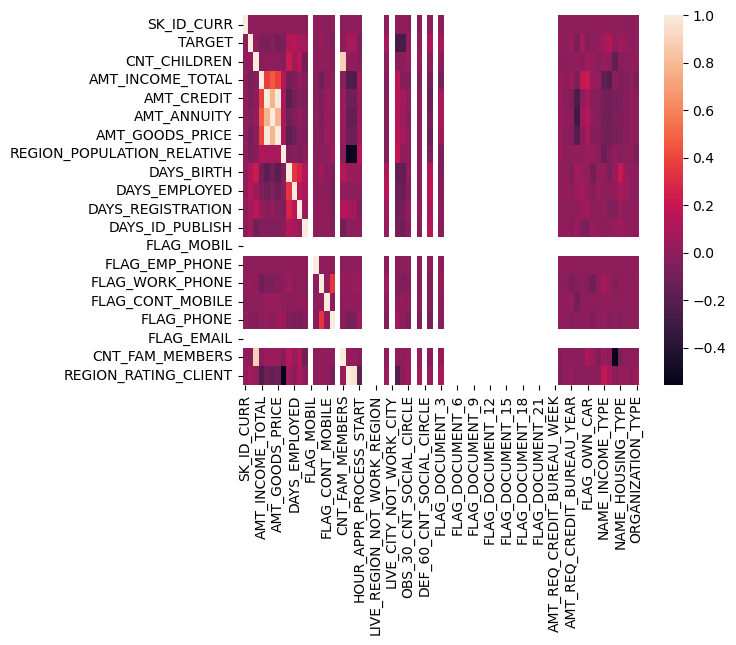

In [38]:
# Calculate the correlation matrix for the cleaned dataset
correlation_matrix = cleaned_data_ss.corr()

# Get the correlation of each feature with the target variable
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=False)

# Display the top 20 most correlated features with the target variable
print("Top 20 Features Correlated with the Target Variable:\n", target_correlation.head(20))

sns.heatmap(data=correlation_matrix.head(20))

In [39]:
keep_col=list(target_correlation.reset_index().head(20).iloc[:,0])

In [40]:
data_3_cleaned= cleaned_data[keep_col]

In [41]:
data_3_cleaned_ss= ss.fit_transform(data_3_cleaned)
data_3_cleaned_ss=pd.DataFrame(data_3_cleaned_ss)

In [42]:
data_3_cleaned_ss.columns=data_3_cleaned.columns
data_3_cleaned_ss.drop(columns='TARGET',inplace=True)

In [43]:
# Separate features (X) and target (y)
X3 = data_3_cleaned_ss
y3 = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_3rd = RandomForestClassifier(random_state=42)

# Train the model using all features
model_3rd.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = model_3rd.predict(X3_test)

M3_accuracy=accuracy_score(y3_test, y3_pred)*100
M3_classification_report= classification_report(y3_test, y3_pred)

# Evaluate the model's performance
print("Accuracy Score:", M3_accuracy)
print("\nClassification Report:\n",M3_classification_report)


Accuracy Score: 60.545585068198136

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59      3399
           1       0.61      0.62      0.62      3566

    accuracy                           0.61      6965
   macro avg       0.61      0.60      0.61      6965
weighted avg       0.61      0.61      0.61      6965



- Balanced Metrics: The performance metrics for both classes are fairly consistent, indicating a balanced model.
-  With an overall accuracy of 61%, there is potential for enhancement.

- The best Random Forest model is the first one, which utilizes all the available features. Although all the 3 models still needs improvement.

### Model_4: GRIDsearch + Random Forest


In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})
grid_search.fit(X4_train, y4_train)

best_model = grid_search.best_estimator_

y4_pred = best_model.predict(X4_test)

M4_accuracy = accuracy_score(y4_test, y4_pred) * 100
M4_classification_report=classification_report(y4_test, y4_pred)

print("Accuracy Score:", M4_accuracy)
print("\nClassification Report:\n",M4_classification_report )


Accuracy Score: 66.18808327351041

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      3399
           1       0.67      0.66      0.67      3566

    accuracy                           0.66      6965
   macro avg       0.66      0.66      0.66      6965
weighted avg       0.66      0.66      0.66      6965



- Accuracy: The model achieved an accuracy score of approximately 66.19%, indicating that about two-thirds of the predictions are correct.
- precision, recall, and F1 score are all 0.66, suggesting balanced performance across both classes without being influenced by class size.

## Model_5:  Random forest + PCA  

In [45]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix without the target variable

# Let's retain enough components to explain 95% of the variance in the data
pca = PCA(n_components=0.95)  # This means we'll keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check how many components were chosen
print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

X5_train_pca, X5_test_pca, y5_train, y5_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = RandomForestClassifier(random_state=42)

model_pca.fit(X5_train_pca, y5_train)

y5_pred_pca = model_pca.predict(X5_test_pca)


M5_accuracy = accuracy_score(y5_test, y5_pred_pca) * 100
M5_classification_report=classification_report(y5_test, y5_pred_pca)


print("Accuracy Score:", M5_accuracy)
print("\nClassification Report:\n", M5_classification_report)


Number of components chosen by PCA: 33
Accuracy Score: 64.86719310839914

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      3399
           1       0.66      0.65      0.66      3566

    accuracy                           0.65      6965
   macro avg       0.65      0.65      0.65      6965
weighted avg       0.65      0.65      0.65      6965



- 33 components were chosen by PCA, indicating a significant reduction in dimensionality while retaining essential features.
- Accuracy: The model achieved an accuracy score of approximately 64.87%, suggesting that around 65% of the predictions are correct.
- Precision and recall values indicatE balanced prediction capabilities for both classes.

### Model_6: Logistic+pca

In [46]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix without the target variable

# Set the number of components to explain a certain percentage of variance, e.g., 95%
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

X6_train_pca, X6_test_pca, y6_train, y6_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X6_train_pca, y6_train)

y6_pred_pca = logistic_model.predict(X6_test_pca)


M6_accuracy = accuracy_score(y6_test, y6_pred_pca)*100
M6_classification_report=classification_report(y6_test, y6_pred_pca)


print("Accuracy Score:", M6_accuracy)
print("\nClassification Report:\n", M6_classification_report)


Number of components chosen by PCA: 33
Accuracy Score: 66.5470208183776

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      3399
           1       0.67      0.68      0.68      3566

    accuracy                           0.67      6965
   macro avg       0.67      0.67      0.67      6965
weighted avg       0.67      0.67      0.67      6965



- 33 components were selected by PCA, indicating effective dimensionality reduction while retaining essential information.
- The model achieved an accuracy score of approximately 66.55%, indicating that about two-thirds of the predictions are correct.
- The macro averages for precision, recall, and F1 score are all 0.67, indicating balanced performance across both classes.


In [47]:
print("Model_1 : Accuracy Score:", M1_accuracy)
print("Model_2 : Accuracy Score:", M2_accuracy)
print("Model_3 : Accuracy Score:", M3_accuracy)
print("Model_4 : Accuracy Score:", M4_accuracy)
print("Model_5 : Accuracy Score:", M5_accuracy)
print("Model_6 : Accuracy Score:", M6_accuracy)


Model_1 : Accuracy Score: 66.18808327351041
Model_2 : Accuracy Score: 60.94759511844939
Model_3 : Accuracy Score: 60.545585068198136
Model_4 : Accuracy Score: 66.18808327351041
Model_5 : Accuracy Score: 64.86719310839914
Model_6 : Accuracy Score: 66.5470208183776


### The most optimal choice for prediction is using Logistic Regression combined with PCA, which achieves the highest accuracy.



